In [1]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')    
    print(os.getcwd())

/code/tcav/tcav_examples/discrete
/code


In [2]:
from tensorflow.io import gfile
from tcav.tcav_examples.discrete.kdd99_activation_generator import KDD99DiscreteActivationGenerator
from tcav.utils import create_session
from tcav.tcav_examples.discrete.kdd99_model_wrapper import KDD99KerasModelWrapper


In [3]:
# Make source directory, 
source_dir = "./tcav/tcav_examples/discrete/kdd_sanity2"
working_dir = source_dir
acts_dir = os.path.join(working_dir, "activations")
gfile.makedirs(acts_dir)
cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)


In [4]:
# Make data
! python ./tcav/tcav_examples/discrete/make_kdd99_concepts.py --source_dir={source_dir}


2021-03-26 18:59:27.860577: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
[[0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 ...
 [0 b'tcp' b'http' ... 0.01 0.0 0.0]
 [0 b'tcp' b'http' ... 0.01 0.0 0.0]
 [0 b'tcp' b'http' ... 0.01 0.0 0.0]]
[b'normal.' b'normal.' b'normal.' ... b'normal.' b'normal.' b'normal.']
Available concepts for KDD99 dataset are: 
['dst_host_same_src_port_rate_less_than_one', 'dst_host_same_src_port_rate_more_than_one', 'serror_rate_less_than_one', 'serror_rate_more_than_one']


Available targets for KDD99 dataset are: 
[b'normal.' b'buffer_overflow.' b'loadmodule.' b'perl.' b'neptune.'
 b'smurf.' b'guess_passwd.' b'pod.' b'teardrop.' b'portsweep.' b'ipsweep.'
 b'land.' b'ftp_write.' b'back.' b'imap.' b'satan.' b'phf.' b'nmap.'
 b'multihop.' b'warezmaster.' b'warezclient.' b'spy.' b'rootkit.']


Created 10 random folders 

Successfully

In [5]:
# Create models
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "kdd99_2.h5")
uci_model = KDD99KerasModelWrapper(create_session(), model_path, label_path)



In [6]:
# Create activation generator
act_gen = KDD99DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

In [7]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

target = "imap."
bottlenecks = ["dense", "dense_1" ]
concepts = ['dst_host_same_src_port_rate_less_than_one', 'dst_host_same_src_port_rate_more_than_one', 
            'serror_rate_less_than_one', 'serror_rate_more_than_one']
alphas = [0.01]



my_tcav = TCAV(create_session,
                   target,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)


results = my_tcav.run()


INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_0'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_1'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_2'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_3'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_4'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_5'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_6'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_7'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_8'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_9'] imap. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_more_tha

INFO:tensorflow:dense ['random500_8', 'random500_3'] imap. 0.01
INFO:tensorflow:dense ['random500_8', 'random500_4'] imap. 0.01
INFO:tensorflow:dense ['random500_8', 'random500_5'] imap. 0.01
INFO:tensorflow:dense ['random500_8', 'random500_6'] imap. 0.01
INFO:tensorflow:dense ['random500_8', 'random500_7'] imap. 0.01
INFO:tensorflow:dense ['random500_8', 'random500_9'] imap. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_0'] imap. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_1'] imap. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_2'] imap. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_3'] imap. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_4'] imap. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_5'] imap. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_6'] imap. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_7'] imap. 0.01
INFO:tensorflow:dense ['random500_9', 'random500_8'] imap. 0.01
INFO:tensorflow:dense_1 ['dst_host_same_

INFO:tensorflow:dense_1 ['random500_6', 'random500_3'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_6', 'random500_4'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_6', 'random500_5'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_6', 'random500_7'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_6', 'random500_8'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_6', 'random500_9'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_7', 'random500_0'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_7', 'random500_1'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_7', 'random500_2'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_7', 'random500_3'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_7', 'random500_4'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_7', 'random500_5'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_7', 'random500_6'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_7', 'random500_8'] imap. 0.01
INFO:tensorflow:dense_1 ['random500_7', 'random500_9'] imap. 0.01
INFO:tenso

INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_src_port_rate_less_than_one-random500_7-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_less_than_one': 1.0, 'random500_7': 0.75, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 8 of 260
INFO:tensorflow:running imap. ['dst_host_same_src_port_rate_less_than_one', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_less_than_one_dense shape (200, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_src_port_rate_less_than_one-random500_8-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'dst_host_

INFO:tensorflow:Running param 18 of 260
INFO:tensorflow:running imap. ['dst_host_same_src_port_rate_more_than_one', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_more_than_one_dense shape (200, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_src_port_rate_more_than_one-random500_8-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_more_than_one': 1.0, 'random500_8': 0.5, 'overall': 0.7142857142857143}
INFO:tensorflow:Running param 19 of 260
INFO:tensorflow:running imap. ['dst_host_same_src_port_rate_more_than_one', 'random500_9']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activ

INFO:tensorflow:CAV accuracies: {'serror_rate_less_than_one': 1.0, 'random500_7': 0.6666666666666666, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 28 of 260
INFO:tensorflow:running imap. ['serror_rate_less_than_one', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_serror_rate_less_than_one_dense shape (200, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:Training CAV ['serror_rate_less_than_one', 'random500_8'] - dense alpha 0.01
INFO:tensorflow:training with alpha=0.01
INFO:tensorflow:acc per class {'serror_rate_less_than_one': 1.0, 'random500_8': 1.0, 'overall': 1.0}
INFO:tensorflow:CAV accuracies: {'serror_rate_less_than_one': 1.0, 'random500_8': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 29 of 260
INFO:tensorflo

INFO:tensorflow:Training CAV ['serror_rate_more_than_one', 'random500_7'] - dense alpha 0.01
INFO:tensorflow:training with alpha=0.01
INFO:tensorflow:acc per class {'serror_rate_more_than_one': 1.0, 'random500_7': 1.0, 'overall': 1.0}
INFO:tensorflow:CAV accuracies: {'serror_rate_more_than_one': 1.0, 'random500_7': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 38 of 260
INFO:tensorflow:running imap. ['serror_rate_more_than_one', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_serror_rate_more_than_one_dense shape (200, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:Training CAV ['serror_rate_more_than_one', 'random500_8'] - dense alpha 0.01
INFO:tensorflow:training with alpha=0.01
INFO:tensorflow:acc per class {'serror_rate_more_than

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_0_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_1-random500_0-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_1': 0.25, 'random500_0': 0.3333333333333333, 'overall': 0.2857142857142857}
INFO:tensorflow:Running param 50 of 260
INFO:tensorflow:running imap. ['random500_1', 'random500_2']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_2_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activat

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_2_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_2-random500_4-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_2': 1.0, 'random500_4': 0.25, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 62 of 260
INFO:tensorflow:running imap. ['random500_2', 'random500_5']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_2_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap.

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_7_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_3-random500_7-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_3': 1.0, 'random500_7': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 74 of 260
INFO:tensorflow:running imap. ['random500_3', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_3_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_3-random500_8-den

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_0_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_5-random500_0-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_5': 0.0, 'random500_0': 0.3333333333333333, 'overall': 0.14285714285714285}
INFO:tensorflow:Running param 86 of 260
INFO:tensorflow:running imap. ['random500_5', 'random500_1']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_6-random500_3-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_6': 0.25, 'random500_3': 1.0, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 98 of 260
INFO:tensorflow:running imap. ['random500_6', 'random500_4']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_6_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_6-random500_4-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_6': 0.0, 'random500_4': 0.75, 'overall

INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_7-random500_6-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_7': 1.0, 'random500_6': 0.6666666666666666, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 110 of 260
INFO:tensorflow:running imap. ['random500_7', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_7_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_7-random500_8-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_7': 0.6666666666666666, 'random500_8': 1.0, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 111 of 260
INFO:tensorflow:ru

INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_9-random500_0-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_9': 1.0, 'random500_0': 0.3333333333333333, 'overall': 0.7142857142857143}
INFO:tensorflow:Running param 122 of 260
INFO:tensorflow:running imap. ['random500_9', 'random500_1']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_9_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense shape (10, 1000)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense shape (12, 1000)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_9-random500_1-dense-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_9': 1.0, 'random500_1': 0.0, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 123 of 260
INFO:tensorflow:running imap. ['r

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_less_than_one_dense_1 shape (200, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_3_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_src_port_rate_less_than_one-random500_3-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_less_than_one': 1.0, 'random500_3': 0.6666666666666666, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 134 of 260
INFO:tensorflow:running imap. ['dst_host_same_src_port_rate_less_than_one', 'random500_4']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_less_than_one_dense_1 shape (200, 256)
INFO:tensorflow:Loaded ./tcav/t

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_src_port_rate_more_than_one-random500_3-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_more_than_one': 1.0, 'random500_3': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 144 of 260
INFO:tensorflow:running imap. ['dst_host_same_src_port_rate_more_than_one', 'random500_4']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_more_than_one_dense_1 shape (200, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/dst_host_same_sr

INFO:tensorflow:Training CAV ['serror_rate_less_than_one', 'random500_3'] - dense_1 alpha 0.01
INFO:tensorflow:training with alpha=0.01
INFO:tensorflow:acc per class {'serror_rate_less_than_one': 1.0, 'random500_3': 1.0, 'overall': 1.0}
INFO:tensorflow:CAV accuracies: {'serror_rate_less_than_one': 1.0, 'random500_3': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 154 of 260
INFO:tensorflow:running imap. ['serror_rate_less_than_one', 'random500_4']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_serror_rate_less_than_one_dense_1 shape (200, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:Training CAV ['serror_rate_less_than_one', 'random500_4'] - dense_1 alpha 0.01
INFO:tensorflow:training with alpha=0.01
INFO:tensorflow:acc per class {'serror_rate_l

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:Training CAV ['serror_rate_more_than_one', 'random500_3'] - dense_1 alpha 0.01
INFO:tensorflow:training with alpha=0.01
INFO:tensorflow:acc per class {'serror_rate_more_than_one': 0.6666666666666666, 'random500_3': 1.0, 'overall': 0.8571428571428571}
INFO:tensorflow:CAV accuracies: {'serror_rate_more_than_one': 0.6666666666666666, 'random500_3': 1.0, 'overall': 0.8571428571428571}
INFO:tensorflow:Running param 164 of 260
INFO:tensorflow:running imap. ['serror_rate_more_than_one', 'random500_4']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_serror_rate_more_than_one_dense_1 shape (200, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tens

INFO:tensorflow:CAV accuracies: {'random500_0': 0.0, 'random500_4': 1.0, 'overall': 0.42857142857142855}
INFO:tensorflow:Running param 174 of 260
INFO:tensorflow:running imap. ['random500_0', 'random500_5']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_0_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_0-random500_5-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_0': 0.0, 'random500_5': 0.75, 'overall': 0.42857142857142855}
INFO:tensorflow:Running param 175 of 260
INFO:tensorflow:running imap. ['random500_0', 'random500_6']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_0_dense_1 shape

INFO:tensorflow:CAV accuracies: {'random500_1': 1.0, 'random500_7': 0.3333333333333333, 'overall': 0.7142857142857143}
INFO:tensorflow:Running param 186 of 260
INFO:tensorflow:running imap. ['random500_1', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_1-random500_8-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_1': 0.0, 'random500_8': 0.6666666666666666, 'overall': 0.2857142857142857}
INFO:tensorflow:Running param 187 of 260
INFO:tensorflow:running imap. ['random500_1', 'random500_9']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/act

INFO:tensorflow:CAV accuracies: {'random500_3': 0.6666666666666666, 'random500_0': 0.0, 'overall': 0.2857142857142857}
INFO:tensorflow:Running param 198 of 260
INFO:tensorflow:running imap. ['random500_3', 'random500_1']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_3_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_3-random500_1-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_3': 0.3333333333333333, 'random500_1': 0.75, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 199 of 260
INFO:tensorflow:running imap. ['random500_3', 'random500_2']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/ac

INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_4-random500_3-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_4': 0.5, 'random500_3': 0.3333333333333333, 'overall': 0.42857142857142855}
INFO:tensorflow:Running param 210 of 260
INFO:tensorflow:running imap. ['random500_4', 'random500_5']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_4-random500_5-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_4': 0.5, 'random500_5': 0.0, 'overall': 0.2857142857142857}
INFO:tensorflow:Running param 211 of 260
INFO:tensorflow:running i

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_5-random500_7-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_5': 1.0, 'random500_7': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 222 of 260
INFO:tensorflow:running imap. ['random500_5', 'random500_8']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_5_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_5-random500_8-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_5': 0.75, 'random500_8': 1.0, 'overall': 0.85

INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_7-random500_0-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_7': 0.5, 'random500_0': 1.0, 'overall': 0.7142857142857143}
INFO:tensorflow:Running param 234 of 260
INFO:tensorflow:running imap. ['random500_7', 'random500_1']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_7_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_1_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_7-random500_1-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_7': 1.0, 'random500_1': 1.0, '

INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_8-random500_3-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_8': 1.0, 'random500_3': 0.25, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 246 of 260
INFO:tensorflow:running imap. ['random500_8', 'random500_4']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_8_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_4_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_8-random500_4-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_8': 0.5, 'random500_4': 0.6666666666666666, 'overall': 0.5714285714285714}
INFO:tensorflow:Running param 247 of 260
INFO:tensorflow:running i

INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_9-random500_6-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_9': 0.3333333333333333, 'random500_6': 0.25, 'overall': 0.2857142857142857}
INFO:tensorflow:Running param 258 of 260
INFO:tensorflow:running imap. ['random500_9', 'random500_7']
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_9_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_random500_7_dense_1 shape (10, 256)
INFO:tensorflow:Loaded ./tcav/tcav_examples/discrete/kdd_sanity2/activations/acts_imap._dense_1 shape (12, 256)
INFO:tensorflow:CAV already exists: ./tcav/tcav_examples/discrete/kdd_sanity2/cav/random500_9-random500_7-dense_1-linear-0.01.pkl
INFO:tensorflow:CAV accuracies: {'random500_9': 1.0, 'random500_7': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 259 of 260
INFO:tensorflow:running imap. ['random50

Class = imap.
  Concept = dst_host_same_src_port_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.82 (+- 0.37), random was 0.46 (+- 0.49). p-val = 0.027 (significant)
    Bottleneck = dense_1. TCAV Score = 0.95 (+- 0.15), random was 0.46 (+- 0.48). p-val = 0.002 (significant)
  Concept = dst_host_same_src_port_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.52 (+- 0.48), random was 0.46 (+- 0.49). p-val = 0.677 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.48 (+- 0.45), random was 0.46 (+- 0.48). p-val = 0.878 (not significant)
  Concept = serror_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.74 (+- 0.35), random was 0.46 (+- 0.49). p-val = 0.079 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.92 (+- 0.25), random was 0.46 (+- 0.48). p-val = 0.004 (significant)
  Concept = serror_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.30), random was 0.46 (+- 0.49). p-val = 0.006 (significant)
    Bottleneck = dense_1. TC

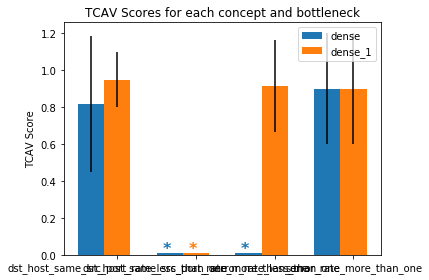

In [8]:
utils_plot.plot_results(results, num_random_exp=10)



In [10]:
from tcav.utils import print_results
print_results(results)

Class = imap.
  Concept = dst_host_same_src_port_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.82 (+- 0.37), random was 0.46 (+- 0.49). p-val = 0.027 (significant)
    Bottleneck = dense_1. TCAV Score = 0.95 (+- 0.15), random was 0.46 (+- 0.48). p-val = 0.002 (significant)
  Concept = dst_host_same_src_port_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.52 (+- 0.48), random was 0.46 (+- 0.49). p-val = 0.677 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.48 (+- 0.45), random was 0.46 (+- 0.48). p-val = 0.878 (not significant)
  Concept = serror_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.74 (+- 0.35), random was 0.46 (+- 0.49). p-val = 0.079 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.92 (+- 0.25), random was 0.46 (+- 0.48). p-val = 0.004 (significant)
  Concept = serror_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.30), random was 0.46 (+- 0.49). p-val = 0.006 (significant)
    Bottleneck = dense_1. TC